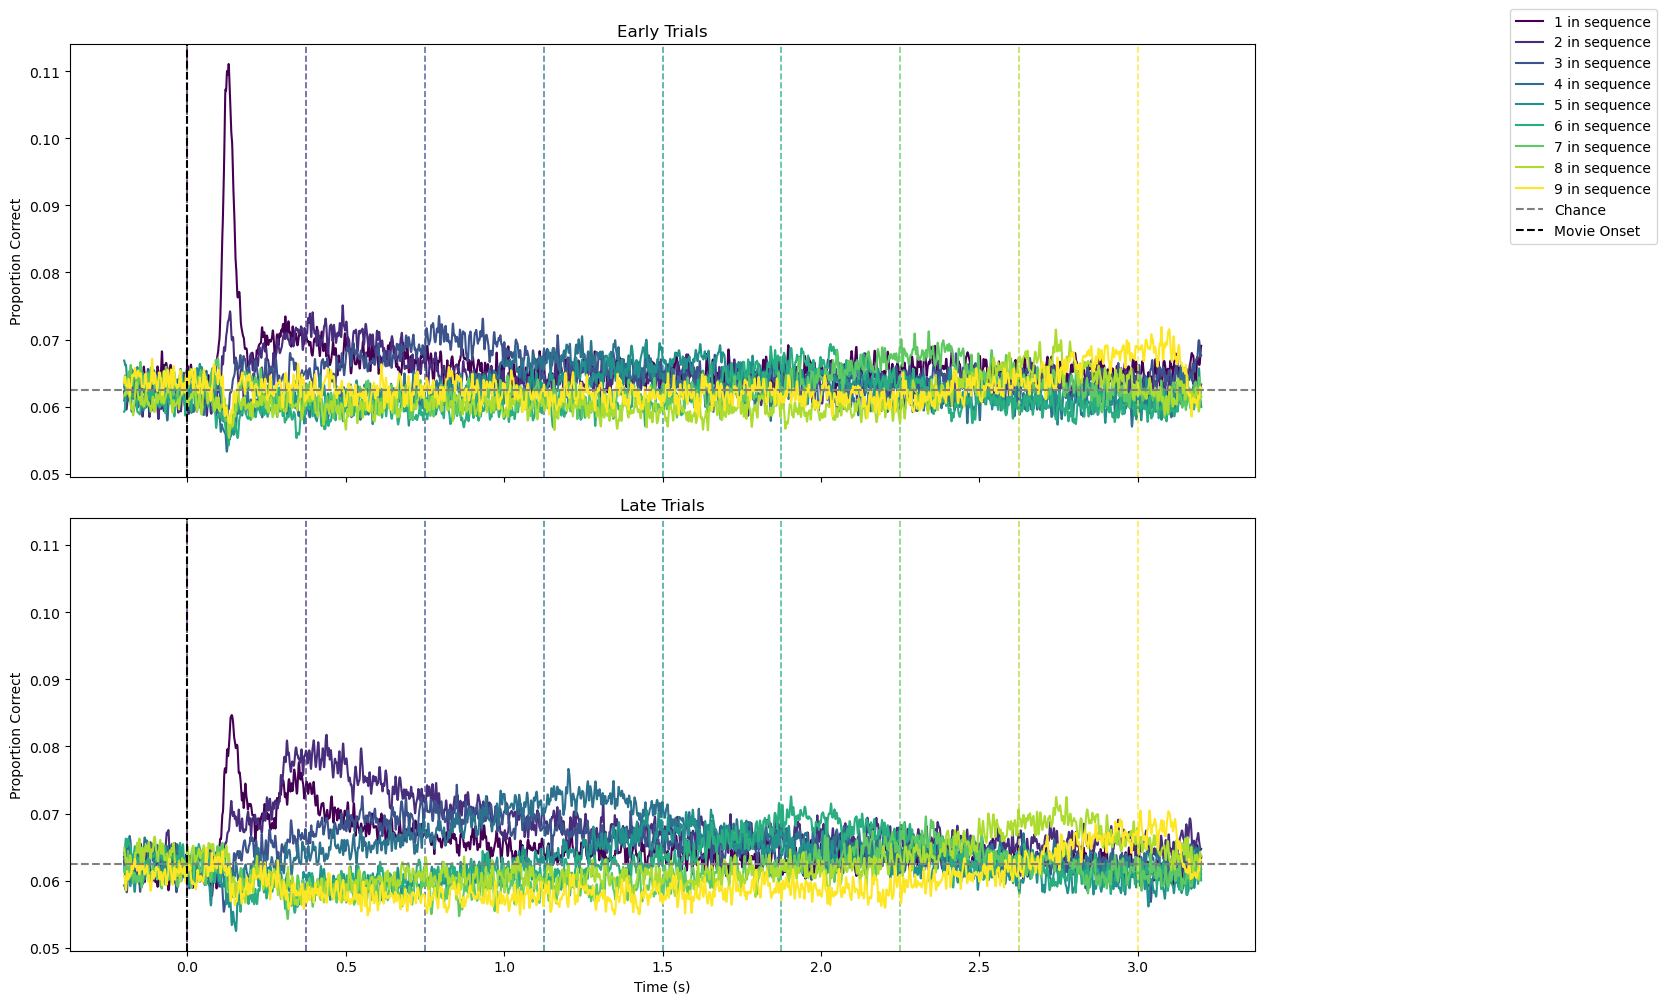

In [ ]:
"""Plot proportions of predictions over the entire movie duration, across all movies and based on relative position"""


import numpy as np 
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d


data_path = '/System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/!Important Data/ProportionsOverTime/'
scores_early = np.load(data_path + 'GroupAverage_SequencedAccuracyEarlyall.npy')
scores_late = np.load(data_path + 'GroupAverage_SequencedAccuracyLateall.npy')

n_positions = scores_early.shape[0]
times = np.linspace(-.2, 3.2, scores_early.shape[1])
# Color map
colors = plt.cm.viridis(np.linspace(0, 1, n_positions))

# Create figure and subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True, sharey=True)

for ax, data, title in zip(axes, [scores_early, scores_late], ['Early Trials', 'Late Trials']):
    for pos in range(n_positions):
        smoothed = gaussian_filter1d(data[pos], sigma=2)
        ax.plot(times, smoothed, label=f'{pos+1} in sequence', color=colors[pos])
        onset_time = pos * 0.375
        if times[0] <= onset_time <= times[-1]:
            ax.axvline(onset_time, linestyle='--', color=colors[pos], alpha=0.8, linewidth=1.2)

    ax.axhline(1/16, linestyle='--', color='gray', label='Chance')
    ax.axvline(0, linestyle='--', color='black', label='Movie Onset')
    ax.set_ylabel('Proportion Correct')
    ax.set_title(title)

axes[-1].set_xlabel('Time (s)')

# Shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.01, 1), borderaxespad=0.)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()